In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from titanic.data.make_dataset import load_titanic

titanic = load_titanic()
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Поиск пропусков в данных

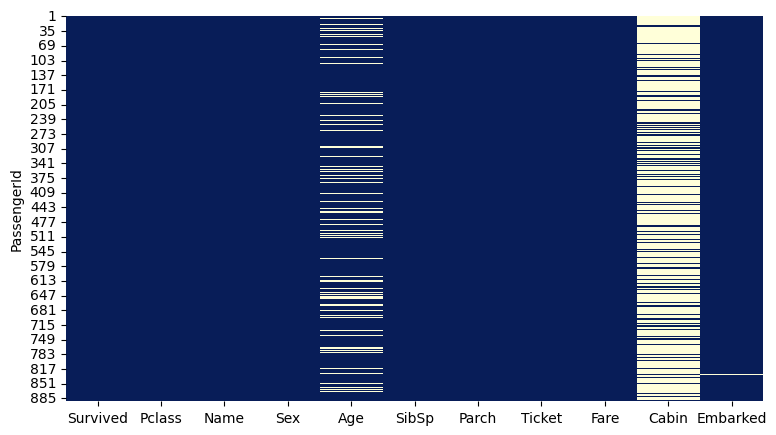

In [28]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(titanic.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

## Распределение целевого класса

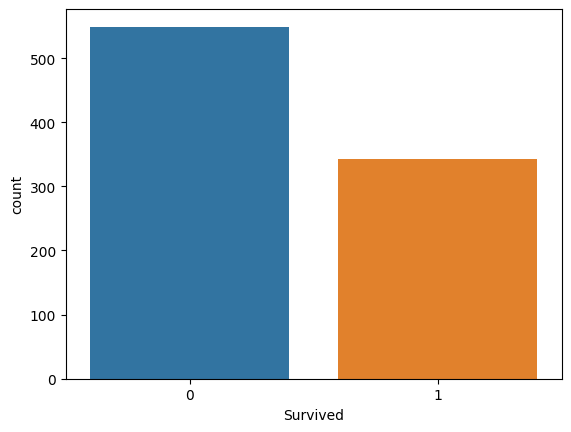

In [29]:
sns.countplot(x='Survived', data=titanic);

## Распределение признаков в зависимости от целевой переменной

AttributeError: 'numpy.int64' object has no attribute 'startswith'

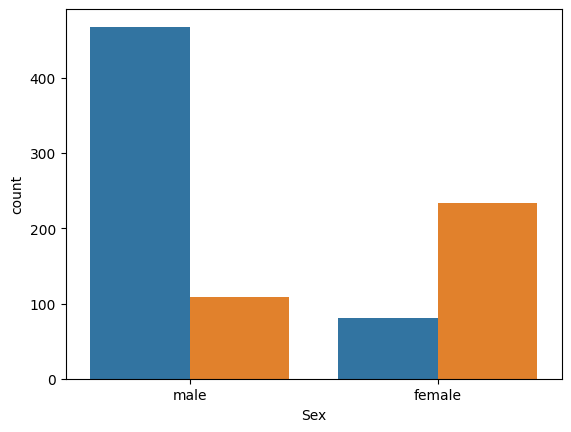

In [30]:
sns.countplot(x='Sex', hue='Survived', data=titanic);

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=titanic);

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=titanic);

In [ ]:
sns.countplot(x='SibSp', hue='Survived', data=titanic);

In [ ]:
sns.countplot(x='Parch', hue='Survived', data=titanic);

## Корреляция целевой перменной с признаками

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Sex")
plt.show()

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x='Pclass', y='Age', hue='Survived', dodge=True, bw=0.05, data=titanic, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

## Извлечение признаков

In [31]:
from titanic.features.extract import *

titanic['family_size'] = family_size(titanic)
titanic['is_alone'] = is_alone(titanic)

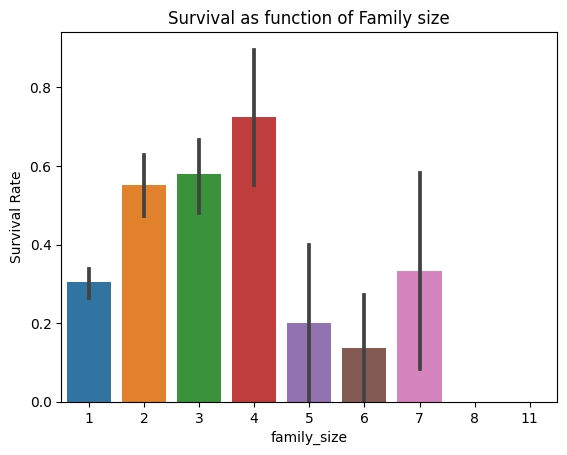

In [32]:
sns.barplot(x='family_size', y='Survived', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Family size")
plt.show()

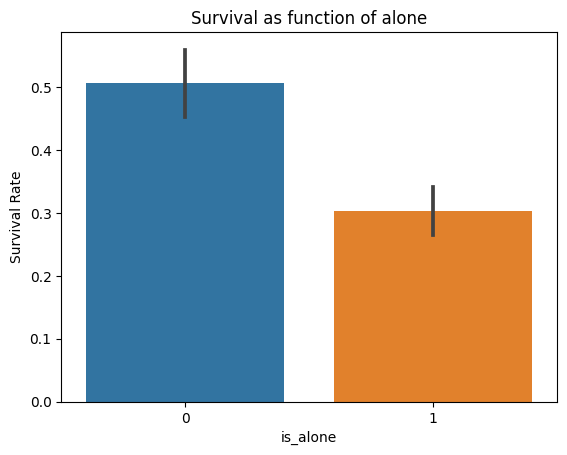

In [33]:
sns.barplot(x='is_alone', y='Survived', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of alone")
plt.show()

## Заполнение пропусков

In [36]:
from titanic.features.fill import fill_embarked, fill_age

titanic['Embarked'] = fill_embarked(titanic)[:, 0]
titanic['Age'] = fill_age(titanic)[:, 0]